<a href="https://colab.research.google.com/github/vinhpeters/tf-exam/blob/main/08_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
   !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-21 15:13:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-21 15:13:51 (60.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-04-21 15:13:57--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   752KB/s    in 0.8s    

2023-04-21 15:13:58 (752 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data('/content/nlp_getting_started.zip')

## Data exploration

In [5]:
import pandas as pd

train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df_shuffled = train_df.sample(frac=1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
len(train_df), len(test_df)

(7613, 3263)

In [10]:
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text,target = row
  print(f'Target: {target}','Real disaster' if target > 0 else 'Not a disaster')
  print(f'Text:\n{text}\n')

Target: 1 Real disaster
Text:
Today marks the 70th anniversary of the bombing of Hiroshima a city I visited and was humbled by in November 2013 http://t.co/AcC1z5Q9Zw

Target: 0 Not a disaster
Text:
@alanhahn @HDumpty39 Daughtery would get destroyed on twitter. His comments are emotionally driven rants with little factual basis

Target: 0 Not a disaster
Text:
If it wasn't for the Blood! ????

Target: 1 Real disaster
Text:
70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/pmS4pMuR0q

Target: 0 Not a disaster
Text:
#PBBan (Temporary:300) Russaky89 @'aRmageddon | DO NOT KILL | FLAGS ONLY | Fast XP' for Reason



In [11]:
from sklearn.model_selection import train_test_split


In [12]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'], train_df_shuffled['target'], test_size=0.1, random_state=42)

In [13]:
len(train_sentences)

6851

In [14]:
train_sentences[:10],train_labels[:10]

(5921    @mogacola @zamtriossu i screamed after hitting...
 3904              Imagine getting flattened by Kurt Zouma
 2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
 3718    @shakjn @C7 @Magnums im shaking in fear he's g...
 1667    Somehow find you and I collide http://t.co/Ee8...
 4435    @EvaHanderek @MarleyKnysh great times until th...
 2544                     destroy the free fandom honestly
 7223    Weapons stolen from National Guard Armory in N...
 4265    @wfaaweather Pete when will the heat wave pass...
 6568    Patient-reported outcomes in long-term survivo...
 Name: text, dtype: object,
 5921    0
 3904    0
 2804    1
 3718    0
 1667    0
 4435    1
 2544    1
 7223    0
 4265    1
 6568    1
 Name: target, dtype: int64)

## Text vectorization

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [16]:
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams = None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=False)

In [17]:
round(sum([len(sentence.split()) for sentence in train_sentences])/len(train_sentences))

15

In [18]:
max_vocab_length = 10000
max_length = 15

In [19]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length
                                 )

In [20]:
text_vectorizer.adapt(train_sentences)

In [21]:
vocab = text_vectorizer.get_vocabulary()

In [22]:
len(vocab)

10000

In [23]:
vocab[:5]

['', '[UNK]', 'the', 'a', 'in']

In [24]:
vocab[-5:]

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

## Embedding 

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim=128,
                             input_length = max_length
                             )

embedding

In [26]:
random_sentence = random.choice(train_sentences)

print(random_sentence)
print(embedding(text_vectorizer([random_sentence])))

that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time
tf.Tensor(
[[[ 0.01486589 -0.0048185   0.01303692 ... -0.03374173  0.03577993
   -0.01640689]
  [-0.02824512 -0.01066699  0.0463126  ...  0.0047806   0.0443946
    0.01205653]
  [-0.02274703  0.02444602 -0.01256678 ... -0.01845203 -0.01857716
    0.00444917]
  ...
  [ 0.03812343 -0.01791928  0.03917725 ...  0.04995631  0.00954878
    0.0227926 ]
  [-0.00391211  0.03234607  0.0278603  ... -0.04261439  0.02312836
    0.04813278]
  [ 0.03455473 -0.04950116 -0.04848726 ... -0.03593101  0.04391917
   -0.02603049]]], shape=(1, 15, 128), dtype=float32)


## Model 0 Naive Bayes

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [28]:
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

### Evaluate baseline model

In [29]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [30]:
baseline_preds = model_0.predict(val_sentences)

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  model_accuracy = accuracy_score(y_true,y_pred)
  model_precision, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true,y_pred)
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision[0],
                   'recall': model_recall[0],
                   'f1':model_fscore[0]}

  return model_results


In [32]:
baseline_results = calculate_results(y_true=val_labels, y_pred=baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [33]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

## Model 1 Simple dense model

In [34]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs,outputs, name='model_1_dense')

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [36]:
model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [37]:
model_1_history=model_1.fit(x=train_sentences, y=train_labels, epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20230421-151407
Epoch 1/5
215/215 [==============================] - 25s 83ms/step - loss: 0.6121 - accuracy: 0.6913 - val_loss: 0.5347 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4414 - accuracy: 0.8178 - val_loss: 0.4686 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3478 - accuracy: 0.8603 - val_loss: 0.4584 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2843 - accuracy: 0.8933 - val_loss: 0.4653 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2377 - accuracy: 0.9115 - val_loss: 0.4774 - val_accuracy: 0.7808


In [38]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7808


[0.47738370299339294, 0.7808399200439453]

In [39]:
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [40]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [41]:
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [42]:
model_1_results = calculate_results(y_true=val_labels,y_pred=model_1_preds)
model_1_results

{'accuracy': 0.7808398950131233,
 'precision': 0.7644539614561028,
 'recall': 0.8623188405797102,
 'f1': 0.8104426787741204}

In [43]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

## Visualizng learned embeddings

In [44]:
len(vocab)

10000

In [45]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [46]:
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape

(10000, 128)

In [47]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

## Model 2 LSTM

In [48]:
inputs = layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x=layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')



In [49]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [50]:
model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [51]:
model_2_history=model_2.fit(x=train_sentences, y=train_labels, epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name='model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230421-151451
Epoch 1/5
215/215 [==============================] - 18s 56ms/step - loss: 0.2179 - accuracy: 0.9203 - val_loss: 0.5762 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1585 - accuracy: 0.9402 - val_loss: 0.5943 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1292 - accuracy: 0.9524 - val_loss: 0.7193 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1042 - accuracy: 0.9606 - val_loss: 0.8670 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0818 - accuracy: 0.9692 - val_loss: 0.9402 - val_accuracy: 0.7677


In [52]:
model_2_pred_probs=model_2.predict(val_sentences)

24/24 [==============================] - 1s 3ms/step


In [53]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [54]:
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 0.7677165354330708,
 'precision': 0.7687074829931972,
 'recall': 0.8188405797101449,
 'f1': 0.7929824561403509}

## Model 3 GRU

In [55]:
inputs = layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x = embedding(x)
x=layers.GRU(64)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')



In [56]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [57]:
model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [58]:
model_3_history=model_3.fit(x=train_sentences, y=train_labels, epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name='model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230421-151537
Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.1594 - accuracy: 0.9407 - val_loss: 0.7419 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0832 - accuracy: 0.9688 - val_loss: 0.7488 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0749 - accuracy: 0.9710 - val_loss: 0.8168 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0613 - accuracy: 0.9750 - val_loss: 1.0669 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0514 - accuracy: 0.9783 - val_loss: 1.2197 - val_accuracy: 0.7651


In [59]:
model_3_pred_probs=model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

24/24 [==============================] - 1s 4ms/step


In [60]:
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 0.7650918635170604,
 'precision': 0.7559912854030502,
 'recall': 0.8381642512077294,
 'f1': 0.7949599083619702}

## Model 4 Bidirectional RNN

In [61]:
inputs = layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_4_Bidirectional')


In [62]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [63]:
model_4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics =['accuracy'])

In [64]:
model_4_history=model_4.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230421-151621
Epoch 1/5
215/215 [==============================] - 21s 63ms/step - loss: 0.1002 - accuracy: 0.9651 - val_loss: 0.7815 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0564 - accuracy: 0.9747 - val_loss: 1.1765 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0444 - accuracy: 0.9793 - val_loss: 1.3778 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0440 - accuracy: 0.9791 - val_loss: 1.3340 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0394 - accuracy: 0.9807 - val_loss: 1.6369 - val_accuracy: 0.7664


In [65]:
model_4_pred_probs=model_4.predict(val_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

24/24 [==============================] - 1s 4ms/step


In [66]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.7664041994750657,
 'precision': 0.7448132780082988,
 'recall': 0.8671497584541062,
 'f1': 0.8013392857142858}

## Model 5 1D Convolutional

In [67]:
inputs = layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_Conv1D')


In [68]:
model_5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics =['accuracy'])

In [69]:
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_5_conv1D')])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20230421-151659
Epoch 1/5
215/215 [==============================] - 17s 53ms/step - loss: 0.1242 - accuracy: 0.9610 - val_loss: 0.9053 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0739 - accuracy: 0.9730 - val_loss: 0.9908 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0589 - accuracy: 0.9765 - val_loss: 1.1168 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0539 - accuracy: 0.9784 - val_loss: 1.1689 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0521 - accuracy: 0.9778 - val_loss: 1.1663 - val_accuracy: 0.7651


In [70]:
model_5_pred_probs=model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

24/24 [==============================] - 0s 2ms/step


In [71]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 0.7650918635170604,
 'precision': 0.775175644028103,
 'recall': 0.7995169082125604,
 'f1': 0.7871581450653983}

In [72]:
## Model 6 Universal Sentence Encoder

In [73]:
import tensorflow_hub as hub

In [74]:
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [75]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name = 'USE')

In [76]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid', name='output_layer')
], name = 'model_6_USE')

In [77]:
model_6.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics =['accuracy'])

In [78]:
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20230421-151835
Epoch 1/5
215/215 [==============================] - 13s 33ms/step - loss: 0.5082 - accuracy: 0.7784 - val_loss: 0.4487 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.4144 - accuracy: 0.8139 - val_loss: 0.4372 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.4006 - accuracy: 0.8238 - val_loss: 0.4318 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3919 - accuracy: 0.8267 - val_loss: 0.4287 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3852 - accuracy: 0.8307 - val_loss: 0.4240 - val_accuracy: 0.8202


In [79]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

24/24 [==============================] - 1s 15ms/step


In [80]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 0.8202099737532809,
 'precision': 0.8112359550561797,
 'recall': 0.8719806763285024,
 'f1': 0.8405122235157159}

## Model 7: TF Hub Pretrained USE but with 10% of training data

In [81]:
train_10_percent = pd.DataFrame(list(zip(train_sentences,train_labels)), columns=['text','target']).sample(frac=0.1, random_state=42)

In [82]:
train_10_percent

,text,target
1022,Families to sue over Legionnaires: More than 4...,1
5740,@Jones94Kyle now I've said all this he's dead ...,0
3153,@argentings WE COULD HAVE HAD IT AAAAAAALLLL I...,1
3276,Map: Typhoon Soudelor's predicted path as it a...,1
4874,So when r u getting married'@Foxy__Siren: Oh f...,0
...,...,...
2464,Do you feel deluged by low self-image? Take th...,0
6313,@lordRsBiscuits That's always good for a prett...,1
87,@i_electroCute your turn ??,0
465,Sitting still in the #CityofMemphis traffic is...,0


In [83]:
train_labels_10_percent = train_10_percent['target'].to_list()
train_sentences_10_percent = train_10_percent['text'].to_list()

In [84]:
train_10_percent.target.value_counts()

0    414
1    271
Name: target, dtype: int64

In [85]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid', name='output_layer')
], name = 'model_7_USE')

In [86]:
model_7.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics =['accuracy'])

In [87]:
model_7_history=model_7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences, val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_7_USE_10_percent')])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent/20230421-151920
Epoch 1/5
22/22 [==============================] - 3s 47ms/step - loss: 0.6656 - accuracy: 0.7036 - val_loss: 0.6415 - val_accuracy: 0.7283
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5866 - accuracy: 0.8102 - val_loss: 0.5833 - val_accuracy: 0.7559
Epoch 3/5
22/22 [==============================] - 0s 22ms/step - loss: 0.5087 - accuracy: 0.8175 - val_loss: 0.5331 - val_accuracy: 0.7638
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4469 - accuracy: 0.8277 - val_loss: 0.5005 - val_accuracy: 0.7756
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4070 - accuracy: 0.8438 - val_loss: 0.4920 - val_accuracy: 0.7795


In [88]:
model_7_pred_probs=model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

24/24 [==============================] - 1s 9ms/step


In [89]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.7795275590551181,
 'precision': 0.7573221757322176,
 'recall': 0.8743961352657005,
 'f1': 0.8116591928251121}

## Comparing each model

In [90]:
all_model_results = pd.DataFrame({'0_baseline':baseline_results,
                                 '1_simple_dense': model_1_results,
                                 '2_lstm': model_2_results,
                                 '3_gru': model_3_results,
                                 '4_bidirectional': model_4_results,
                                 '5_conv1d': model_5_results,
                                 '6_USE': model_6_results,
                                 '7_USE_10_percent': model_7_results})

all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.748062,0.932367,0.830108
1_simple_dense,0.780840,0.764454,0.862319,0.810443
2_lstm,0.767717,0.768707,0.818841,0.792982
3_gru,0.765092,0.755991,0.838164,0.794960
4_bidirectional,0.766404,0.744813,0.867150,0.801339
5_conv1d,0.765092,0.775176,0.799517,0.787158
6_USE,0.820210,0.811236,0.871981,0.840512
7_USE_10_percent,0.779528,0.757322,0.874396,0.811659


<Axes: >

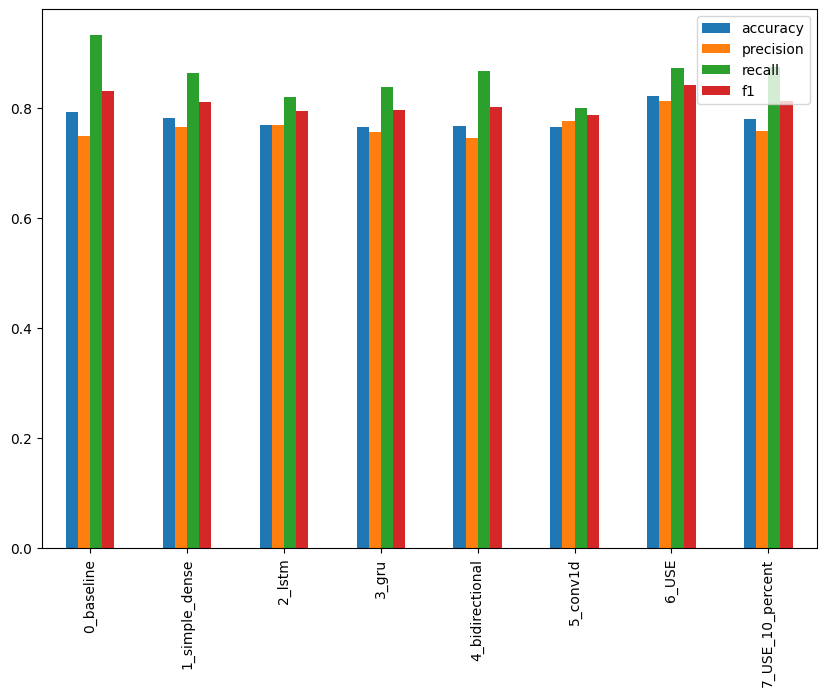

In [92]:
all_model_results.plot(kind='bar', figsize=(10,7))

## TensorBoard

In [93]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP TF Exam" --description 'Comparing NLP architectures on Kaggle Disaster Tweet dataset' \
  --one_shot


2023-04-21 15:51:15.356822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   WBR-TFJ-MBN



New experiment created. View your TensorBoard at: https://tensorboard.dev/experi

In [91]:
ye